In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Project 2 - Book recommendations/Books (2).csv')
df1 = pd.read_csv('/content/drive/My Drive/Project 2 - Book recommendations/Ratings (1).csv')
df2 = pd.read_csv('/content/drive/My Drive/Project 2 - Book recommendations/Users (2).csv')

### **Overview of the Dateset**

In [4]:
#General information of Datasets
print(df.info())
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2),

In [5]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
df1.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
df2.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### **Data cleaning**

In [8]:
#Checking for duplicates in every dataframe
print(df.duplicated().sum())
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0
0


In [9]:
#Missing values in every dataframe
print(df.isnull().sum())
print(df1.isnull().sum())
print(df2.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64


In [10]:
#Dropping missing values in Books dataset
df.dropna(inplace=True)

In [11]:
#Extracting Avg-Rating and num of ratings
#Group by ISBN and calculate both avg rating and number of reviews
book_rating_stats = df1.groupby('ISBN').agg(
    avg_rating=('Book-Rating', 'mean'),
    num_ratings=('Book-Rating', 'count')  #total number of ratings per book
).reset_index()

#Merging with books set on ISBN
df = df.merge(book_rating_stats, on='ISBN', how='left')

#Fill missing values (books with no reviews)
df['avg_rating'] = df['avg_rating'].fillna(0)
df['num_ratings'] = df['num_ratings'].fillna(0).astype(int)

In [12]:
#Extracting popularity score out of avg_rating and num_ratings per book
df['popularity_score'] = df['avg_rating'] * np.sqrt(df['num_ratings'])


#Grouping and aggregate to get author stats
author_stats = df.groupby('Book-Author').agg({
    'Book-Title': 'count',
    'popularity_score': 'mean'
}).rename(columns={
    'Book-Title': 'num_books',
    'popularity_score': 'avg_popularity'
}).reset_index()

#Select top authors
top_authors = author_stats.sort_values(by='num_books', ascending=False).head(10)

#Display top authors
top_authors

,Book-Author,num_books,avg_popularity
1086,Agatha Christie,632,4.896306
100920,William Shakespeare,567,6.248290
91185,Stephen King,524,11.884328
4565,Ann M. Martin,423,1.930289
13495,Carolyn Keene,373,3.526610
30557,Francine Pascal,372,1.982104
39998,Isaac Asimov,330,4.787704
73339,Nora Roberts,315,10.400099
7309,Barbara Cartland,307,4.577100
14420,Charles Dickens,302,4.775638


In [13]:
#Filter by minimum ratings
min_ratings = 10 # You can adjust this value
filtered_df = df[df['num_ratings'] >= min_ratings].copy()


Most_popular_books = filtered_df.sort_values(by='popularity_score', ascending=False).head(10)

#Display top books
Most_popular_books[['Book-Title', 'Book-Author','ISBN', 'avg_rating', 'num_ratings', 'popularity_score']]

,Book-Title,Book-Author,ISBN,avg_rating,num_ratings,popularity_score
408,The Lovely Bones: A Novel,Alice Sebold,0316666343,4.468726,1295,160.812054
748,The Da Vinci Code,Dan Brown,0385504209,4.652322,883,138.245207
2143,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,059035342X,4.900175,571,117.092656
522,The Red Tent (Bestselling Backlist),Anita Diamant,0312195516,4.334716,723,116.554714
356,The Secret Life of Bees,Sue Monk Kidd,0142001740,4.219512,615,104.640500
5506,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,043935806X,5.571856,334,101.829389
706,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,0446672211,4.105983,585,99.310477
37,To Kill a Mockingbird,Harper Lee,0446310786,4.920308,389,97.043652
231,Girl with a Pearl Earring,Tracy Chevalier,0452282152,4.218631,526,96.752998
107,The Five People You Meet in Heaven,Mitch Albom,0786868716,4.543326,427,93.883180


In [14]:
#Convert 'Year-Of-Publication' to numeric, forcing errors to NaN
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')

# Let's assume a reasonable range for publication years
min_year = 1800  # A very old but plausible year for books
max_year = 2024  # Current year or slightly in the future to account for upcoming releases

# Filter and explicitly create a copy to avoid SettingWithCopyWarning
df = df[(df['Year-Of-Publication'] >= min_year) & (df['Year-Of-Publication'] <= max_year)].copy()

# Handle missing values (NaNs created by coercion or outlier removal)
median_year = df['Year-Of-Publication'].median() #You could choose to fill with a median, mean, or a placeholder like 0 or -1
df['Year-Of-Publication'] = df['Year-Of-Publication'].fillna(median_year) #For simplicity, let's fill with the median year

#Converting the column to integer type
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)

In [15]:
#Merging df1 (Ratings) and df2 (Users) on 'User-ID'.This merged DataFrame containing user information and their ratings.
df1 = pd.merge(df1, df2[['User-ID', 'Age', 'Location']], on='User-ID', how='inner')

#Cleaning and extracting country variable from location
df1['Country'] = df1['Location'].str.split(', ').str[-1].str.strip()

#Cleaning Age column
# Filter and explicitly create a copy
df1 = df1[(df1['Age'].isna()) | ((df1['Age'] >= 5) & (df1['Age'] <= 100))].copy()

# Fill missing values without inplace=True
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

# Convert 'Age' to integer type after dropping NaNs
df1['Age'] = df1['Age'].astype(int)

In [16]:
#Merging df and df1 sets
df = pd.merge(df, df1, on='ISBN', how='inner')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,avg_rating,num_ratings,popularity_score,User-ID,Book-Rating,Age,Location,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.000000,1,0.000000,2,0,18,"stockton, california, usa",usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.928571,14,18.441026,8,5,35,"timmins, ontario, canada",canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.928571,14,18.441026,11400,0,49,"ottawa, ontario, canada",canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.928571,14,18.441026,11676,8,35,"n/a, n/a, n/a",n/a
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.928571,14,18.441026,41385,0,35,"sudbury, ontario, canada",canada


In [17]:
#Rearrenging columns
desired_order = ['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','avg_rating','num_ratings','popularity_score','User-ID','Book-Rating','Age','Location','Country','Image-URL-S','Image-URL-M','Image-URL-L']

#Reindex the DataFrame with the desired order
df = df[desired_order]

#Display the head of the DataFrame to see the changes
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,avg_rating,num_ratings,popularity_score,User-ID,Book-Rating,Age,Location,Country,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0.000000,1,0.000000,2,0,18,"stockton, california, usa",usa,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,4.928571,14,18.441026,8,5,35,"timmins, ontario, canada",canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,4.928571,14,18.441026,11400,0,49,"ottawa, ontario, canada",canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,4.928571,14,18.441026,11676,8,35,"n/a, n/a, n/a",n/a,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,4.928571,14,18.441026,41385,0,35,"sudbury, ontario, canada",canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### **Statistical Summary of Dataframes**

In [18]:
#Statistical summary of df
basic_stats = df.describe(include='all')
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

missing_values = df.isnull().sum()

Dist_stats =pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis, 'Missing Values': missing_values}).T

stats_table =pd.concat([basic_stats, Dist_stats], axis=0)
stats_table

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,avg_rating,num_ratings,popularity_score,User-ID,Book-Rating,Age,Location,Country,Image-URL-S,Image-URL-M,Image-URL-L
count,1012551,1012551,1012551,1.012551e+06,1012551,1.012551e+06,1.012551e+06,1.012551e+06,1.012551e+06,1.012551e+06,1.012551e+06,1012551,1012551,1012551,1012551,1012551
unique,264899,236899,100000,NaN,16273,NaN,NaN,NaN,NaN,NaN,NaN,22012,481,264597,264597,264597
top,0971880107,Wild Animus,Stephen King,NaN,Ballantine Books,NaN,NaN,NaN,NaN,NaN,NaN,"toronto, ontario, canada",usa,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
freq,2494,2494,9923,NaN,34547,NaN,NaN,NaN,NaN,NaN,NaN,14583,738831,2494,2494,2494
mean,NaN,NaN,NaN,1.995301e+03,NaN,2.835127e+00,5.433716e+01,1.508562e+01,1.405928e+05,2.836137e+00,3.653130e+01,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.307160e+00,NaN,2.128848e+00,1.605639e+02,1.822729e+01,8.046844e+04,3.853677e+00,1.038814e+01,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.806000e+03,NaN,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.992000e+03,NaN,1.500000e+00,3.000000e+00,4.041452e+00,7.041500e+04,0.000000e+00,3.100000e+01,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.997000e+03,NaN,2.729282e+00,1.000000e+01,9.346852e+00,1.411850e+05,0.000000e+00,3.500000e+01,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.001000e+03,NaN,3.818182e+00,4.300000e+01,1.940000e+01,2.113910e+05,7.000000e+00,4.100000e+01,NaN,NaN,NaN,NaN,NaN


### **Data Visualization**

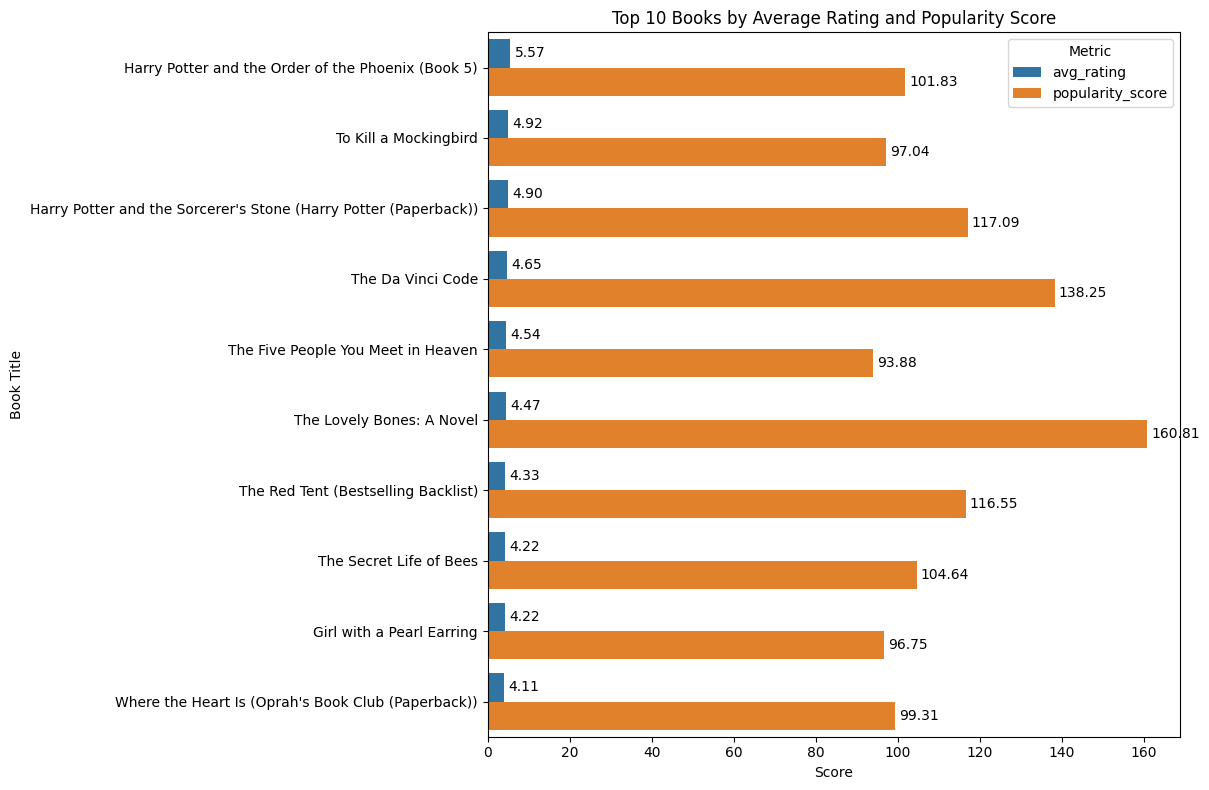

In [19]:
#Prepare top 10 books
top_books = Most_popular_books.sort_values(by='avg_rating', ascending=False).head(10)

#Melt the DataFrame for seaborn compatibility
melted = top_books.melt(id_vars='Book-Title', value_vars=['avg_rating', 'popularity_score'],
                        var_name='Metric', value_name='Value')

#Plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=melted, x='Value', y='Book-Title', hue='Metric', palette='tab10')

# Aesthetics
plt.title('Top 10 Books by Average Rating and Popularity Score')
plt.xlabel('Score')
plt.ylabel('Book Title')
plt.legend(title='Metric')
plt.tight_layout()

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3) # Adjust padding as needed

plt.show()

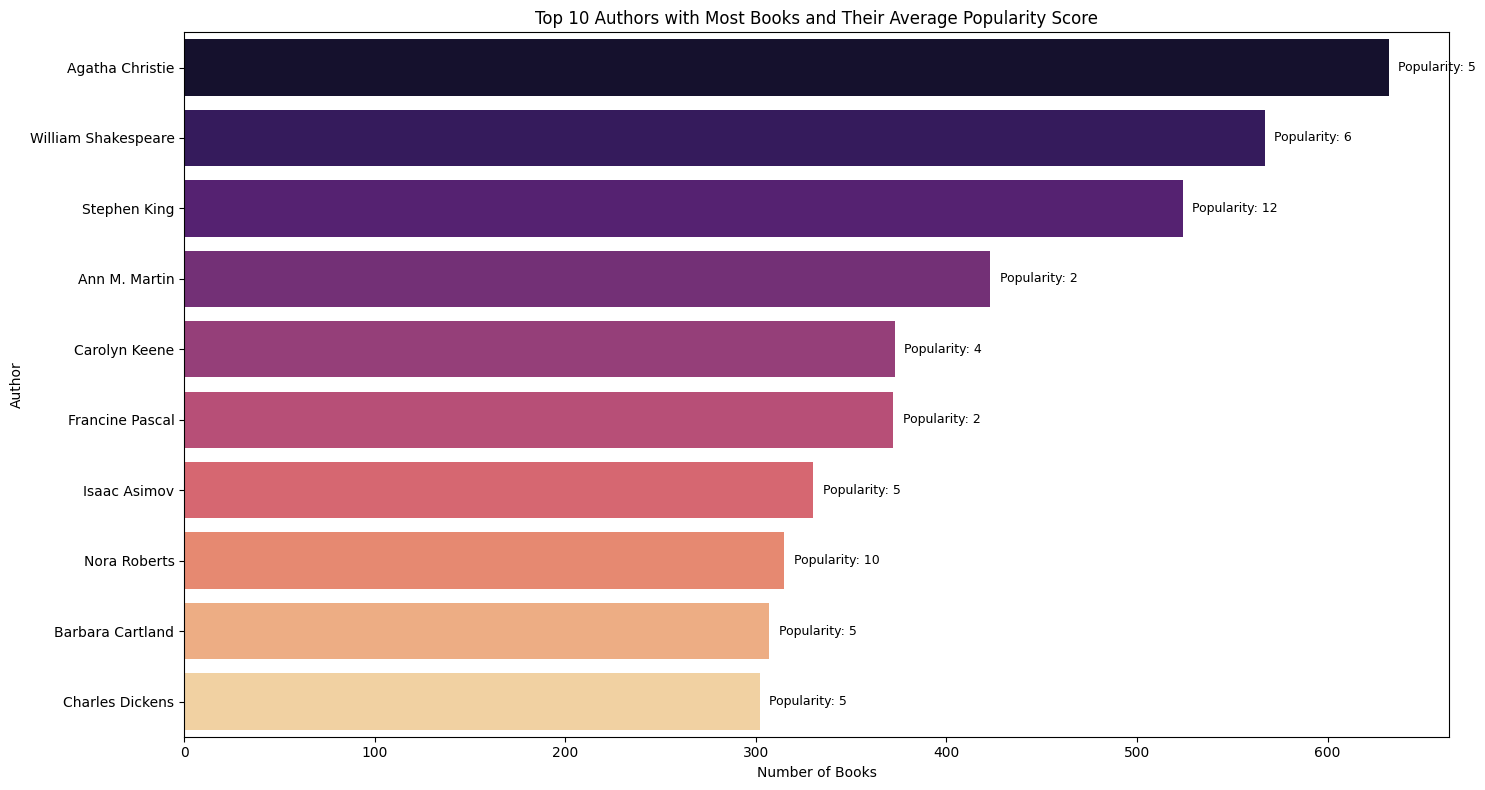

In [20]:
#Bar Plotting top authors with most num of books
plt.figure(figsize=(15, 8))
sns.barplot(data=top_authors, x='num_books', y='Book-Author',hue ='Book-Author', palette='magma', label='Books Count',legend=False)
plt.title('Top 10 Authors with Most Books and Their Average Popularity Score')
plt.xlabel('Number of Books')
plt.ylabel('Author')

# Add popularity score overlay
for i, (popularity, count) in enumerate(zip(top_authors['avg_popularity'], top_authors['num_books'])):
    # Adjusted text position slightly to the right of the bar end
    plt.text(count + 5, i, f'Popularity: {popularity:.0f}', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

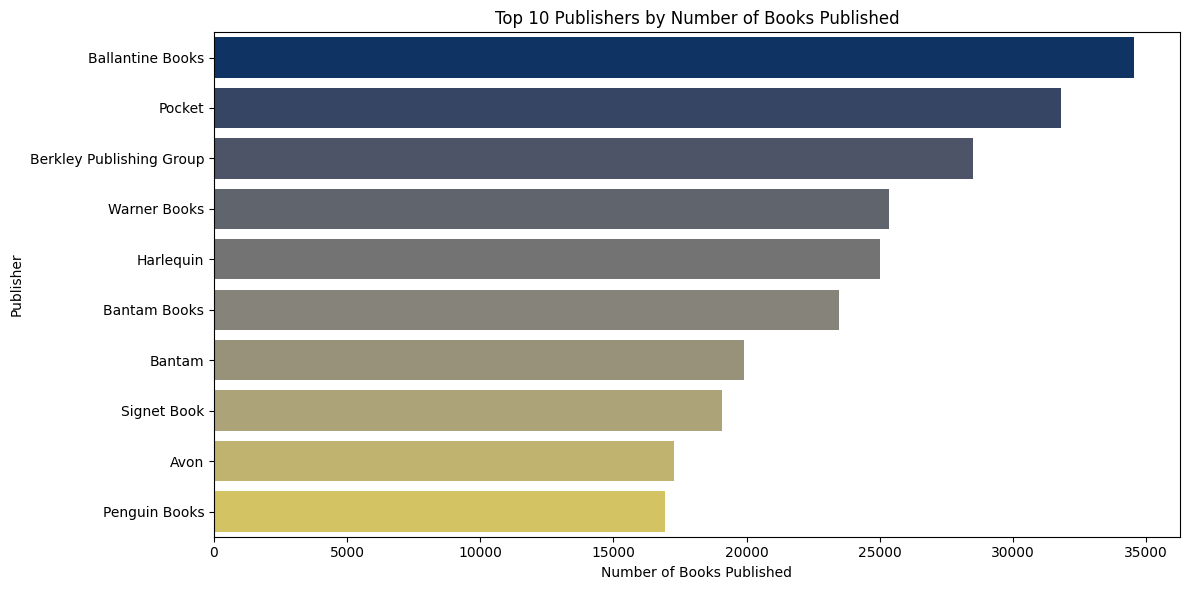

In [21]:
#Top 10 Publishing presses
#Count how many books each publisher has
publisher_counts = df['Publisher'].value_counts().nlargest(10).reset_index()
publisher_counts.columns = ['Publisher', 'BookCount']

# Step 2: Plot the results
plt.figure(figsize=(12,6))
sns.barplot(data=publisher_counts, x='BookCount', y='Publisher',hue = 'Publisher', palette='cividis')
plt.title('Top 10 Publishers by Number of Books Published')
plt.xlabel('Number of Books Published')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

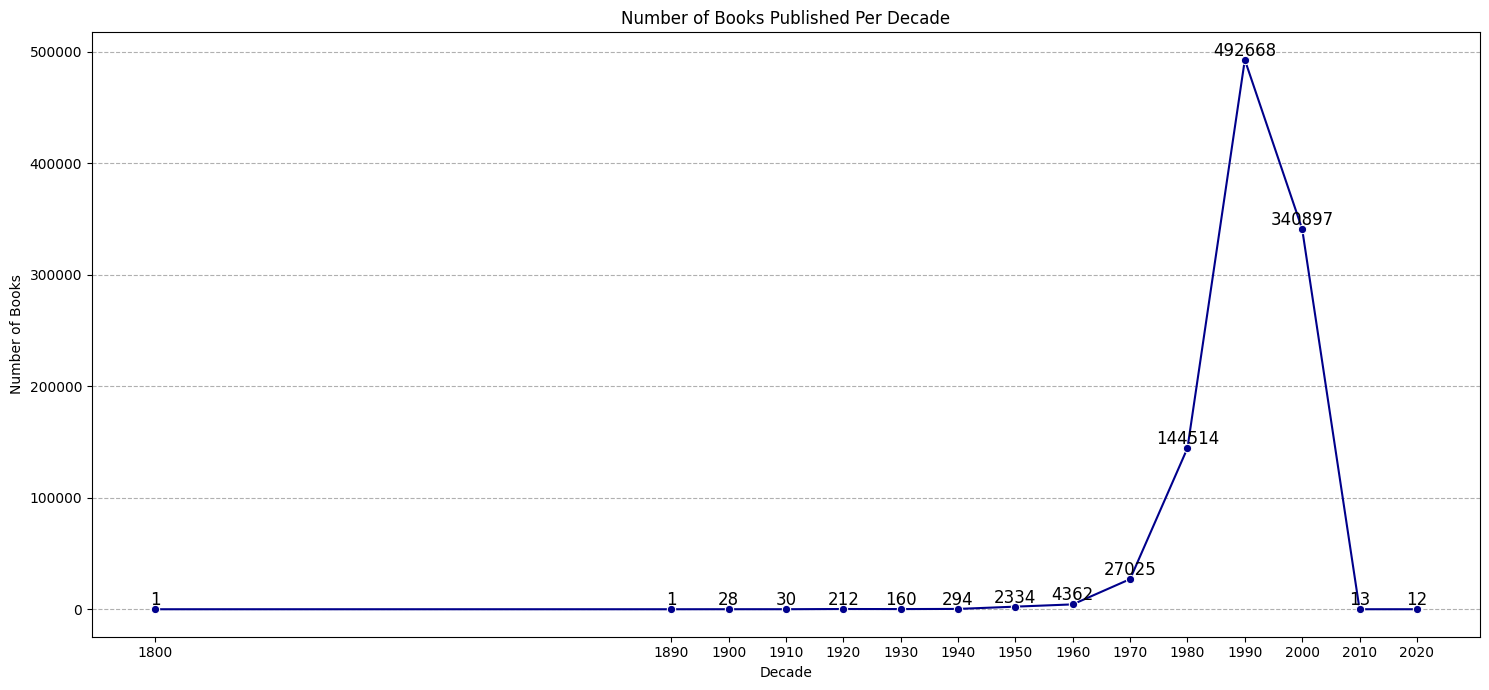

In [22]:
#Visualizing Number of Books Published in a decade
#Grouping YOP by decade
ddf = df.copy()
ddf['Decade'] = (ddf['Year-Of-Publication'] // 10) * 10
books_per_decade = ddf['Decade'].value_counts().sort_index()

#Line Plot
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=books_per_decade.index, y=books_per_decade.values, marker='o', color='darkblue')

#Adding text labels for decade and number of books with adjustments
for x, y in zip(books_per_decade.index, books_per_decade.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12) # Only display the count, centered and slightly above

plt.title('Number of Books Published Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.xticks(books_per_decade.index) #Setting x-ticks to be the decades
plt.grid(True, axis='y', linestyle='--') #Adding horizontal grid lines for better value reading
plt.tight_layout()
plt.show()

In [23]:
#Ensuring the output in Colab
pio.renderers.default = 'colab'

#Getting Top 4 countries
top_4_countries = df1['Country'].value_counts().nlargest(4).index.tolist()

#Filtering out
df_top4 = df1[df1['Country'].isin(top_4_countries)].copy()

#Drop missing or zero values
df_top4 = df_top4[df_top4['Book-Rating'] > 0]
df_top4 = df_top4[df_top4['Age'].notnull()]

#plotting a small sample because a large set of values crashing out the rendering process
top4_s = df_top4.sample(n=1000,random_state=42)

#Plotting 3D Scatter plot
fig = px.scatter_3d(
    top4_s,
    x='User-ID',
    y='Age',
    z='Book-Rating',
    color='Country',
)

fig.update_layout(title='Sample 3D Scatter: User-ID vs Age vs Book-Rating (Top 4 Countries)')
fig.show()

<Figure size 800x400 with 0 Axes>

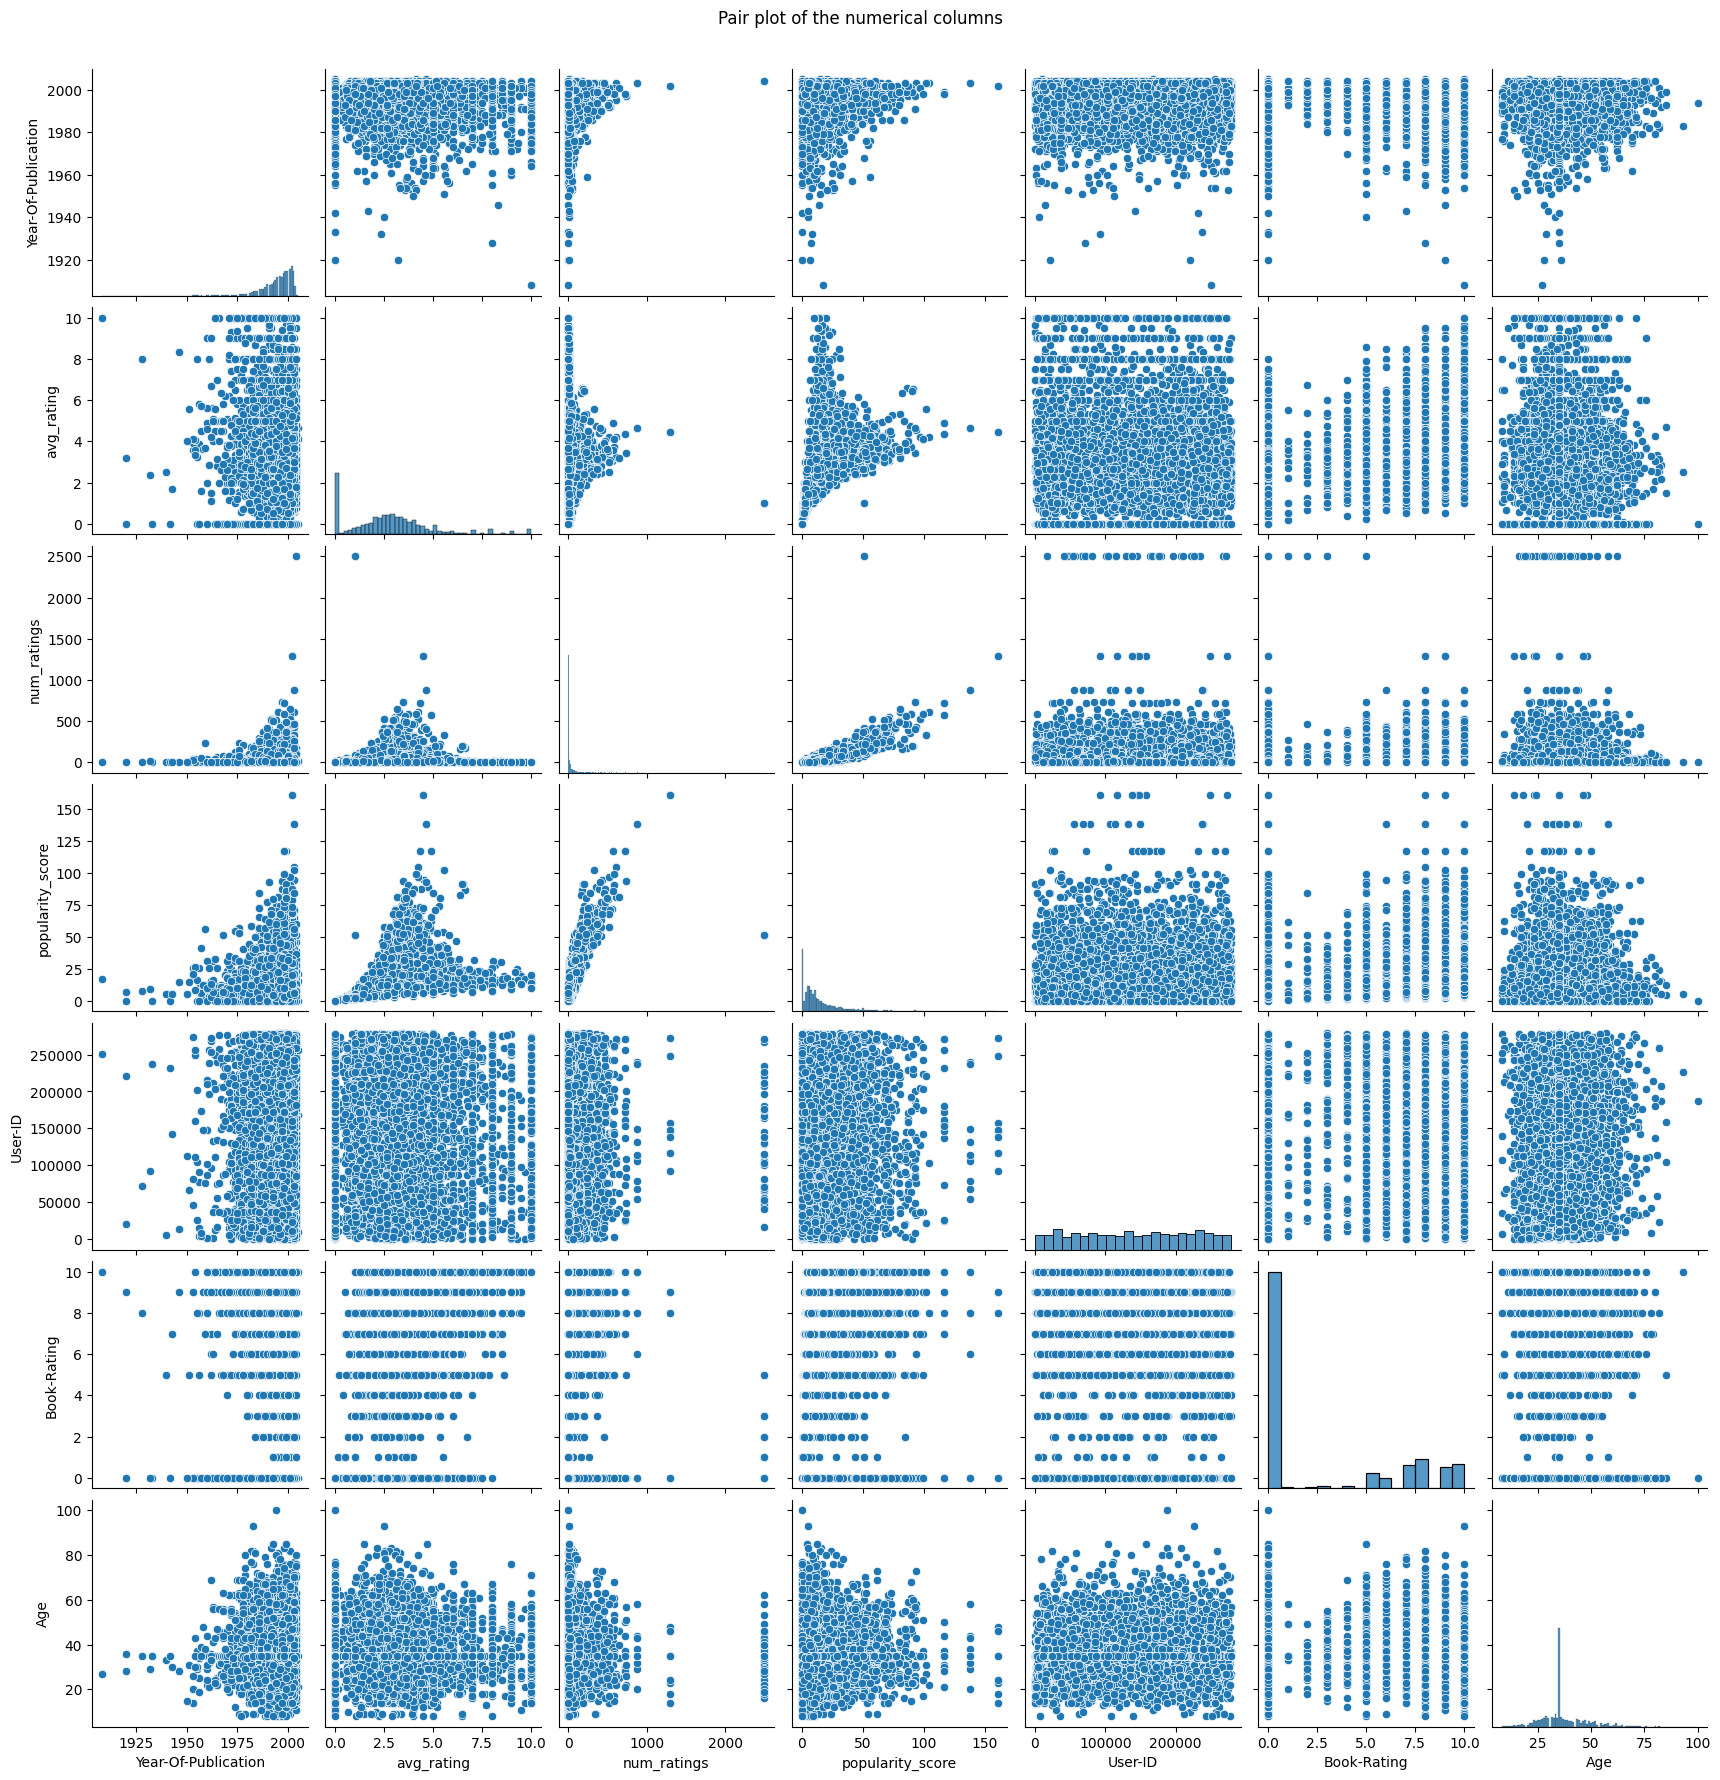

In [24]:
#Pairplot of numerical varibles in books df with small sample
plt.figure(figsize = (8,4))
sns.pairplot(df.sample(n=10000, random_state=42))
plt.suptitle('Pair plot of the numerical columns',y=1.02)
plt.show()

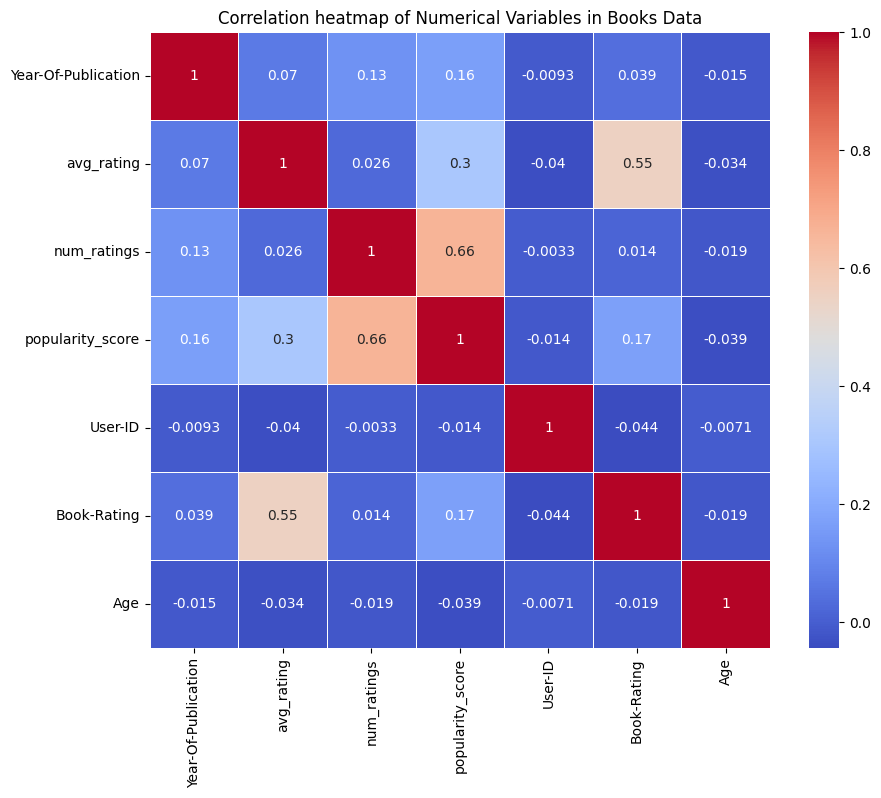

In [25]:
#Correlation heatmap of numerical variables in df(Books Data)
correlation_matrix = df.corr(numeric_only=True)

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation heatmap of Numerical Variables in Books Data')
plt.show()

## **Model Building**

### **Content Based Collaborative Filtering**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#Deduplicate the dataset
unique_books = df.drop_duplicates(subset='ISBN').copy()

def recommend_books_by_search(df, search_query, top_n=10, min_rating=0, min_num_ratings=0):
    """
    Recommend books based on a search query.

    Parameters:
        df (DataFrame): Book metadata including Book-Title, Book-Author, publisher, avg_rating, num_ratings, popularity_score.
        search_query (str): Search string input by the user.
        top_n (int): Number of recommendations to return.
        min_rating (float): Minimum average rating for filtering.
        min_num_ratings (int): Minimum number of ratings for filtering.

    Returns:
        dict: Contains similar_books, top_rated_books, most_popular_books.
    """

    unique_books = df.drop_duplicates(subset='ISBN').copy()
    #Apply filters
    unique_books = unique_books[
        (unique_books['avg_rating'] >= min_rating) &
        (unique_books['num_ratings'] >= min_num_ratings)
    ].reset_index(drop=True)

    #Combine searchable fields
    unique_books['text_search'] = unique_books[['Book-Title', 'Book-Author', 'Publisher']].fillna('').agg(' '.join, axis=1)

    #TF-IDF vectorization
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(unique_books['text_search'])

    #Vectorize search query
    query_vector = tfidf.transform([search_query])

    #Cosine similarity between query and all books
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    #Get top N similar books
    top_indices = cosine_similarities.argsort()[::-1][:top_n]
    similar_books = unique_books.iloc[top_indices].copy()
    similar_books['similarity_score'] = cosine_similarities[top_indices]

    similar_books = similar_books[[
        'ISBN', 'Book-Title', 'Book-Author', 'avg_rating', 'num_ratings', 'popularity_score', 'similarity_score'
    ]]

    # Top Rated Books
    top_rated_books = unique_books.sort_values(by='avg_rating', ascending=False).sample(top_n,random_state=42)[[
        'ISBN', 'Book-Title', 'Book-Author', 'avg_rating', 'num_ratings'
    ]]

    # Most Popular Books
    most_popular_books = unique_books.sort_values(by='popularity_score', ascending=False).sample(top_n,random_state=42)[[
        'ISBN', 'Book-Title', 'Book-Author', 'popularity_score'
    ]]

    return {
        'similar_books': similar_books,
        'top_rated_books': top_rated_books,
        'most_popular_books': most_popular_books
    }

In [27]:
results = recommend_books_by_search(df, search_query='lord of the rings', top_n=10, min_rating=3.5, min_num_ratings=10)

print("🔍 Similar Books to Search Query:")
print(results['similar_books'])

print("\n⭐ Top Rated Books:")
print(results['top_rated_books'])

print("\n🔥 Most Popular Books:")
print(results['most_popular_books'])

🔍 Similar Books to Search Query:
            ISBN                                         Book-Title  \
3162  0618260250                              The Lord of the Rings   
3991  0345296060     The Two Towers (Lord of the Rings (Paperback))   
159   0345339711     The Two Towers (The Lord of the Rings, Part 2)   
4097  0345296087  The Return of the King (Lord of the Rings (Pap...   
700   0345339738  The Return of the King (The Lord of the Rings,...   
1992  0345296052  The Fellowship of the Ring (Lord of the Rings ...   
305   0345339703  The Fellowship of the Ring (The Lord of the Ri...   
1673  0618002235     The Two Towers (The Lord of the Rings, Part 2)   
3882  0618129081     The Two Towers (The Lord of the Rings, Part 2)   
1672  0618002243  The Return of the King (The Lord of The Rings,...   

           Book-Author  avg_rating  num_ratings  popularity_score  \
3162  J. R. R. Tolkien    6.428571           14         24.053512   
3991  J. R. R. Tolkien    3.764706           17

In [28]:
#Evaluating the content based recommendation funtion using diversity,novelty,coverage and popularity bias metrices

def calculate_diversity(recommended_df):
    tfidf = TfidfVectorizer(stop_words='english')
    matrix = tfidf.fit_transform(recommended_df['Book-Title'].fillna(''))
    similarity_matrix = cosine_similarity(matrix)
    upper_triangle = np.triu_indices_from(similarity_matrix, k=1)
    avg_similarity = similarity_matrix[upper_triangle].mean()
    return 1 - avg_similarity  # higher = more diverse

def calculate_novelty(recommended_df):
    recommended_df = recommended_df.copy()
    recommended_df['novelty'] = 1 / (recommended_df['num_ratings'] + 1)
    return recommended_df['novelty'].mean()

def calculate_coverage(all_recs, total_catalog):
    return len(set(all_recs)) / len(set(total_catalog))

def calculate_popularity_bias(recommended_df, threshold=5000):
    return (recommended_df['num_ratings'] > threshold).mean()

def evaluate_combined(
    recommend_function, df, search_queries, top_n=10, min_rating=0, min_num_ratings=0
):
    evaluation_results = {}
    all_isbns_recommended = []

    for query in search_queries:
        print(f"\n--- Evaluating Query: '{query}' ---")
        results = recommend_function(df, query, top_n, min_rating, min_num_ratings)
        recs = results['similar_books']

        result_info = {}
        if recs.empty:
            print("No recommendations.")
            continue

        # Manual checks
        print("\nSimilar Books:")
        display(recs)

        # Store recommended ISBNs for coverage
        all_isbns_recommended.extend(recs['ISBN'].tolist())

        # Evaluation metrics
        diversity = calculate_diversity(recs)
        novelty = calculate_novelty(recs)
        popularity_bias = calculate_popularity_bias(recs)

        result_info['diversity'] = round(diversity, 4)
        result_info['novelty'] = round(novelty, 4)
        result_info['popularity_bias'] = round(popularity_bias, 4)
        evaluation_results[query] = result_info

        print(f"\nMetrics for '{query}':")
        print(f"🔹 Diversity: {diversity:.4f}")
        print(f"🔹 Novelty: {novelty:.4f}")
        print(f"🔹 Popularity Bias: {popularity_bias:.4f}")

    # Coverage across all queries
    catalog = df['ISBN'].unique()
    coverage = calculate_coverage(all_isbns_recommended, catalog)
    print(f"\n📘 Catalog Coverage across all queries: {coverage:.4f}")

    return evaluation_results, round(coverage, 4)

#Testing with sample queries
test_queries = ["harry potter", "lord of the rings", "four blind mice"]

eval_results, overall_coverage = evaluate_combined(
    recommend_books_by_search,
    df,
    test_queries,
    top_n=5,
    min_rating=3.0,
    min_num_ratings=5
)

# Optional: Print all results
print("\n📊 Summary:")
for q, metrics in eval_results.items():
    print(f"{q}: {metrics}")
print(f"Overall coverage: {overall_coverage}")



--- Evaluating Query: 'harry potter' ---

Similar Books:


,ISBN,Book-Title,Book-Author,avg_rating,num_ratings,popularity_score,similarity_score
7578,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,3.533333,15,13.684541,0.757457
741,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,4.900175,571,117.092656,0.728084
15517,2070543587,"Harry Potter, tome 4 : Harry Potter et la coup...",Joanne K. Rowling,3.800000,5,8.497058,0.633663
15691,2070556859,Harry Potter et l'Ordre du PhÃ©nix (Harry Pott...,J.K. Rowling,7.400000,5,16.546903,0.594901
1758,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194,91.108890,0.568730



Metrics for 'harry potter':
🔹 Diversity: 0.6722
🔹 Novelty: 0.0805
🔹 Popularity Bias: 0.0000

--- Evaluating Query: 'lord of the rings' ---

Similar Books:


,ISBN,Book-Title,Book-Author,avg_rating,num_ratings,popularity_score,similarity_score
10736,0965307883,The Lord of the Rings: The QPB Companion to th...,J.R.R. Tolkien,4.800000,5,10.733126,0.770565
15519,0618343997,The Lord of the Rings,J. R. R. Tolkien,5.400000,5,12.074767,0.632169
7858,0618260250,The Lord of the Rings,J. R. R. Tolkien,6.428571,14,24.053512,0.632169
7431,0618153969,The Lord of the Rings,J. R. R. Tolkien,3.285714,7,8.693183,0.632169
14268,0739408259,Lord of the Rings Trilogy,J.R.R. Tolkien,4.000000,5,8.944272,0.611520



Metrics for 'lord of the rings':
🔹 Diversity: 0.2937
🔹 Novelty: 0.1383
🔹 Popularity Bias: 0.0000

--- Evaluating Query: 'four blind mice' ---

Similar Books:


,ISBN,Book-Title,Book-Author,avg_rating,num_ratings,popularity_score,similarity_score
1752,0446613266,Four Blind Mice,James Patterson,3.000000,113,31.890437,0.749148
68,0316693006,Four Blind Mice,James Patterson,4.114754,122,45.448945,0.712474
1809,0425068064,Three Blind Mice and Other Stories,Agatha Christie,3.416667,12,11.835681,0.668793
5043,055327824X,Of Mice and Men,JOHN STEINBECK,4.347826,23,20.851441,0.423093
7195,0553240749,Of Mice and Men,John Steinbeck,5.076923,13,18.305106,0.418060



Metrics for 'four blind mice':
🔹 Diversity: 0.5176
🔹 Novelty: 0.0414
🔹 Popularity Bias: 0.0000

📘 Catalog Coverage across all queries: 0.0001

📊 Summary:
harry potter: {'diversity': np.float64(0.6722), 'novelty': np.float64(0.0805), 'popularity_bias': np.float64(0.0)}
lord of the rings: {'diversity': np.float64(0.2937), 'novelty': np.float64(0.1383), 'popularity_bias': np.float64(0.0)}
four blind mice: {'diversity': np.float64(0.5176), 'novelty': np.float64(0.0414), 'popularity_bias': np.float64(0.0)}
Overall coverage: 0.0001


### **User Based Collaborative Filtering**

In [29]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# --- Step 1: Filter Active Users and Popular Books ---
min_user_ratings = 5
min_book_ratings = 10

# Filter users with at least 'min_user_ratings' ratings
user_counts = df['User-ID'].value_counts()
active_users = user_counts[user_counts >= min_user_ratings].index
df_filtered_users = df[df['User-ID'].isin(active_users)].copy()

# Filter books with at least 'min_book_ratings' ratings
book_counts = df_filtered_users['ISBN'].value_counts()
popular_books = book_counts[book_counts >= min_book_ratings].index
df_filtered = df_filtered_users[df_filtered_users['ISBN'].isin(popular_books)].copy()

# --- Step 2: Create User-Item Matrix ---
user_item_matrix = df_filtered.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

# --- Step 3: Compute User Similarity ---
# Use sparse matrix for performance
sparse_matrix = csr_matrix(user_item_matrix.values)
user_similarity = cosine_similarity(sparse_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# --- Step 4: Recommend Function (Weighted and Excludes Already Rated) ---
def user_based_recommend(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} not found in dataset."

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]
    similarity_scores = similar_users.values
    similar_users_ids = similar_users.index

    user_ratings = user_item_matrix.loc[similar_users_ids]
    weighted_scores = user_ratings.T.dot(similarity_scores) / similarity_scores.sum()

    rated_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = weighted_scores.drop(rated_books, errors='ignore')

    top_isbns = recommendations.sort_values(ascending=False).head(top_n).index


    recommended_books = unique_books[unique_books['ISBN'].isin(top_isbns)].copy()

    # To preserve order as per similarity scores
    recommended_books['score'] = recommended_books['ISBN'].map(recommendations)
    recommended_books = recommended_books.sort_values(by='score', ascending=False)

    return recommended_books[['ISBN', 'Book-Title', 'Book-Author', 'avg_rating', 'num_ratings','popularity_score']]

#Example Usage:
top_books = user_based_recommend(user_id=41385, top_n=5)
print(top_books)

              ISBN                                       Book-Title  \
1       0002005018                                     Clara Callan   
251441  0007106572                                 Guilty Creatures   
440057  0002251760  The Forgetting Room: A Fiction (Byzantium Book)   
584604  0006512062                          Trials of Tiffany Trott   
591125  0006485200                         The Piano Man's Daughter   

                 Book-Author  avg_rating  num_ratings  popularity_score  
1       Richard Bruce Wright    4.928571           14         18.441026  
251441           Sue Welfare    0.900000           20          4.024922  
440057          Nick Bantock    4.846154           13         17.473056  
584604          Isabel Wolff    1.692308           13          6.101702  
591125       Timothy Findley    3.909091           11         12.964988  


In [30]:
#Evaluation for User-Based Collaborative Filtering
def evaluate_user_based(recommend_function, df, user_ids, top_n=5):
    all_isbns_recommended = []
    results = {}

    for user_id in user_ids:
        print(f"\n--- Evaluating Recommendations for User ID: {user_id} ---")
        recs_df = recommend_function(user_id, top_n)

        if isinstance(recs_df, str): # Handle the case where the function returns a string
            print(recs_df)
            continue

        print("Recommended Books:")
        display(recs_df)

        if recs_df.empty:
            print("No recommendations generated.")
            continue

        # Store recommended ISBNs for coverage
        all_isbns_recommended.extend(recs_df['ISBN'].tolist())

        # Calculate evaluation metrics for the current user's recommendations
        diversity = calculate_diversity(recs_df)
        novelty = calculate_novelty(recs_df) # Requires 'num_ratings' in the output df
        popularity_bias = calculate_popularity_bias(recs_df) # Requires 'num_ratings' in the output df

        results[user_id] = {
            'diversity': round(diversity, 4),
            'novelty': round(novelty, 4),
            'popularity_bias': round(popularity_bias, 4)
        }

        print(f"\nMetrics for User {user_id}:")
        print(f"🔹 Diversity: {diversity:.4f}")
        print(f"🔹 Novelty: {novelty:.4f}")
        print(f"🔹 Popularity Bias: {popularity_bias:.4f}")

    #Calculate overall coverage across all users
    catalog = df['ISBN'].unique()
    coverage = calculate_coverage(all_isbns_recommended, catalog)
    print(f"\n📘 Catalog Coverage across all users: {coverage:.4f}")

    return results, round(coverage, 4)

#Test with a few active users
#pick User-IDs that are present in your 'user_item_matrix'
test_user_ids_ubcf = [41385, 11676, 1668]

eval_results_user, overall_coverage_user = evaluate_user_based(
    user_based_recommend,
    df,
    test_user_ids_ubcf,
    top_n=5
)

# Optional: Print all results
print("\n📊 Summary for User-Based Filtering:")
for user_id, metrics in eval_results_user.items():
    print(f"User {user_id}: {metrics}")
print(f"Overall coverage: {overall_coverage_user}")


--- Evaluating Recommendations for User ID: 41385 ---
Recommended Books:


,ISBN,Book-Title,Book-Author,avg_rating,num_ratings,popularity_score
1,0002005018,Clara Callan,Richard Bruce Wright,4.928571,14,18.441026
251441,0007106572,Guilty Creatures,Sue Welfare,0.900000,20,4.024922
440057,0002251760,The Forgetting Room: A Fiction (Byzantium Book),Nick Bantock,4.846154,13,17.473056
584604,0006512062,Trials of Tiffany Trott,Isabel Wolff,1.692308,13,6.101702
591125,0006485200,The Piano Man's Daughter,Timothy Findley,3.909091,11,12.964988



Metrics for User 41385:
🔹 Diversity: 1.0000
🔹 Novelty: 0.0681
🔹 Popularity Bias: 0.0000

--- Evaluating Recommendations for User ID: 11676 ---
Recommended Books:


,ISBN,Book-Title,Book-Author,avg_rating,num_ratings,popularity_score
434115,0440167531,Palomino,DANIELLE STEEL,1.672131,61,13.059762
341041,051513628X,Key of Light (Key Trilogy (Paperback)),Nora Roberts,2.977941,136,34.728463
64333,0671759361,Pearl in the Mist (Landry),V.C. Andrews,2.372549,51,16.943389
278876,0385472943,The Runaway Jury,JOHN GRISHAM,2.988372,86,27.713023
187499,042516876X,Range of Motion,Elizabeth Berg,3.071429,28,16.252472



Metrics for User 11676:
🔹 Diversity: 1.0000
🔹 Novelty: 0.0177
🔹 Popularity Bias: 0.0000

--- Evaluating Recommendations for User ID: 1668 ---
User ID 1668 not found in dataset.

📘 Catalog Coverage across all users: 0.0000

📊 Summary for User-Based Filtering:
User 41385: {'diversity': np.float64(1.0), 'novelty': np.float64(0.0681), 'popularity_bias': np.float64(0.0)}
User 11676: {'diversity': np.float64(1.0), 'novelty': np.float64(0.0177), 'popularity_bias': np.float64(0.0)}
Overall coverage: 0.0


### **Item Based Collaborative filtering**

In [31]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# --- User-item matrix as before ---
item_item_matrix = user_item_matrix.T
sparse_item_matrix = csr_matrix(item_item_matrix.values)

# --- Use NearestNeighbors (memory-efficient) ---
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(sparse_item_matrix)

def item_based_recommend(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} not found."

    user_ratings = user_item_matrix.loc[user_id]
    rated_books = user_ratings[user_ratings > 0].sort_values(ascending=False)

    if rated_books.empty:
        return f"No rated books found for user {user_id}."

    scores = pd.Series(dtype=float)

    for isbn in rated_books.index:
        if isbn not in item_item_matrix.index:
            continue
        try:
            distances, indices = model_knn.kneighbors(
                item_item_matrix.loc[isbn].values.reshape(1, -1),
                n_neighbors=top_n + len(rated_books)
            )
            similar_isbns = item_item_matrix.index[indices.flatten()]
            similarity_scores = 1 - distances.flatten()
            weighted_scores = pd.Series(similarity_scores, index=similar_isbns) * user_ratings[isbn]
            scores = scores.add(weighted_scores, fill_value=0)
        except:
            continue

    scores = scores.drop(rated_books.index, errors='ignore')
    top_isbns = scores.sort_values(ascending=False).head(top_n).index

    # Normalize ISBNs
    df['ISBN'] = df['ISBN'].astype(str).str.strip()
    top_isbns = top_isbns.astype(str).str.strip()
    unique_books = df.drop_duplicates(subset='ISBN')

    recommended_books = unique_books[unique_books['ISBN'].isin(top_isbns)].copy()
    recommended_books['score'] = recommended_books['ISBN'].map(scores)
    recommended_books = recommended_books.sort_values(by='score', ascending=False)
    recommended_books.reset_index(drop=True, inplace=True)

    return recommended_books[['ISBN', 'Book-Title', 'Book-Author', 'avg_rating', 'num_ratings', 'popularity_score']]

similar_books = user_based_recommend(user_id=41385, top_n=5)
print(similar_books)

              ISBN                                       Book-Title  \
1       0002005018                                     Clara Callan   
251441  0007106572                                 Guilty Creatures   
440057  0002251760  The Forgetting Room: A Fiction (Byzantium Book)   
584604  0006512062                          Trials of Tiffany Trott   
591125  0006485200                         The Piano Man's Daughter   

                 Book-Author  avg_rating  num_ratings  popularity_score  
1       Richard Bruce Wright    4.928571           14         18.441026  
251441           Sue Welfare    0.900000           20          4.024922  
440057          Nick Bantock    4.846154           13         17.473056  
584604          Isabel Wolff    1.692308           13          6.101702  
591125       Timothy Findley    3.909091           11         12.964988  


In [32]:
#Evaluating the Item Based Collaborative Filtering
def evaluate_item_based(recommend_function, df, user_ids, top_n=5):
    all_isbns_recommended = []
    results = {}

    for user_id in user_ids:
        print(f"\n--- Evaluating Recommendations for User ID: {user_id} ---")
        recs_df = recommend_function(user_id, top_n)

        if isinstance(recs_df, str):  # Handle the case where the function returns a string
            print(recs_df)
            continue

        print("Recommended Books:")
        display(recs_df)

        if recs_df.empty:
            print("No recommendations generated.")
            continue

        # Store recommended ISBNs for coverage
        all_isbns_recommended.extend(recs_df['ISBN'].tolist())

        # Calculate evaluation metrics for the current user's recommendations
        diversity = calculate_diversity(recs_df)
        novelty = calculate_novelty(recs_df) # Requires 'num_ratings' in the output df
        popularity_bias = calculate_popularity_bias(recs_df) # Requires 'num_ratings' in the output df

        results[user_id] = {
            'diversity': round(diversity, 4),
            'novelty': round(novelty, 4),
            'popularity_bias': round(popularity_bias, 4)
        }

        print(f"\nMetrics for User {user_id}:")
        print(f"🔹 Diversity: {diversity:.4f}")
        print(f"🔹 Novelty: {novelty:.4f}")
        print(f"🔹 Popularity Bias: {popularity_bias:.4f}")

    # Calculate overall coverage across all users
    catalog = df['ISBN'].unique()
    coverage = calculate_coverage(all_isbns_recommended, catalog)
    print(f"\n📘 Catalog Coverage across all users: {coverage:.4f}")

    return results, round(coverage, 4)

# Test with a few active users
test_user_ids = [41385, 11676, 1668]

eval_results_item, overall_coverage_item = evaluate_item_based(
    item_based_recommend,
    df,
    test_user_ids,
    top_n=5
)

# Optional: Print all results
print("\n📊 Summary for Item-Based Filtering:")
for user_id, metrics in eval_results_item.items():
    print(f"User {user_id}: {metrics}")
print(f"Overall coverage: {overall_coverage_item}")


--- Evaluating Recommendations for User ID: 41385 ---
No rated books found for user 41385.

--- Evaluating Recommendations for User ID: 11676 ---
Recommended Books:


,ISBN,Book-Title,Book-Author,avg_rating,num_ratings,popularity_score
0,0821771477,Completely Smitten,Kristine Grayson,2.153846,13,7.765803
1,0312982208,With All My Heart (A Kenyon Family Novel),Barbara Dawson Smith,1.636364,11,5.427204
2,0373710186,Fire Within (America'S Bravest) (Harlequin Sup...,Kathryn Shay,0.900000,10,2.846050
3,0843952083,Wind of the Wolf,Cindy Holby,0.928571,14,3.474396
4,0553584219,Dark Enchantment,KAREN HARBAUGH,0.833333,12,2.886751



Metrics for User 11676:
🔹 Diversity: 1.0000
🔹 Novelty: 0.0779
🔹 Popularity Bias: 0.0000

--- Evaluating Recommendations for User ID: 1668 ---
User ID 1668 not found.

📘 Catalog Coverage across all users: 0.0000

📊 Summary for Item-Based Filtering:
User 11676: {'diversity': np.float64(1.0), 'novelty': np.float64(0.0779), 'popularity_bias': np.float64(0.0)}
Overall coverage: 0.0
